<a id='intro'></a>
## Introduction

> In this report, I am going to be looking at different factors of movies and if different variables are correlated to others. I will be looking at vote count and vote average. Basically how many people rated a movie and what the average rating was

> The dataset that we have is over 10,000 movies, big and small. It includes data like the cast, producing company, budget, release date, popularity, and more. I won't be using all of these columns but they're nice to have.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
% matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.plyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

> You can tell that there is some issues that can be fixed. Issues with the cast, genres, production companies. Let's clean that up (I added a head() call at the end of each cell so you can see what happened)

In [4]:
df['cast'] = df['cast'].str.replace('|', ', ')
df['genres'] = df['genres'].str.replace('|', ', ')
df['production_companies'] = df['production_companies'].str.replace('|', ', ')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,"Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.drop(['overview', 'tagline', 'homepage', 'id', 'imdb_id', 'keywords'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Colin Trevorrow,124,"Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",George Miller,120,"Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",Robert Schwentke,119,"Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",J.J. Abrams,136,"Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",James Wan,137,"Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are still some 0 values in revenue, runtime, and budget. In order to not skew the data, lets fix those.

In [22]:
mean_revenue = df['revenue'].mean()
df['revenue'] = df['revenue'].replace(0, mean_revenue)
mean_revenue_adj = df['revenue_adj'].mean()
df['revenue_adj'] = df['revenue_adj'].replace(0, mean_revenue_adj)

In [23]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,3.550124e+07,6.187164e+07,102.362065,217.389748,5.974922,2001.322658,1.755104e+07,7.980243e+07
std,1.000185,2.721237e+07,1.110204e+08,30.902781,575.619058,0.935142,12.812941,3.430616e+07,1.365610e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,2.370705e+00
25%,0.207583,1.928750e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,5.136436e+07
50%,0.383856,3.982332e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,5.136436e+07
75%,0.713817,3.982332e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Revenue is done, lets do budget.

In [24]:
mean_budget = df['budget'].mean()
df['budget'] = df['budget'].replace(0, mean_revenue)
mean_budget_adj = df['budget_adj'].mean()
df['budget_adj'] = df['budget_adj'].replace(0, mean_revenue_adj)

In [25]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,3.550124e+07,6.187164e+07,102.362065,217.389748,5.974922,2001.322658,4.447644e+07,7.980243e+07
std,1.000185,2.721237e+07,1.110204e+08,30.902781,575.619058,0.935142,12.812941,2.982913e+07,1.365610e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207583,1.928750e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000,2.460594e+07,5.136436e+07
50%,0.383856,3.982332e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000,5.136436e+07,5.136436e+07
75%,0.713817,3.982332e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000,5.136436e+07,5.136436e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Lastly, let's fix the runtime zeroes.

In [20]:
mean_runtime = df['runtime'].mean()
df['runtime'] = df['runtime'].replace(0, mean_runtime)

In [21]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,3.550124e+07,6.187164e+07,102.362065,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,2.721237e+07,1.110204e+08,30.902781,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,1.928750e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,3.982332e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,3.982332e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Let's see the null value situation in our panda dataframe...

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


Looks like theres some Null values, we can replace them all with 'None', since they are all for string values like cast or company.

In [50]:
df.fillna('None', inplace=True) #filling in null values with 'None'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
director                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


<a id='eda'></a>
# Exploratory Data Analysis



## Question 1: How do different variables affect viewer voting ratings?

### Histogram

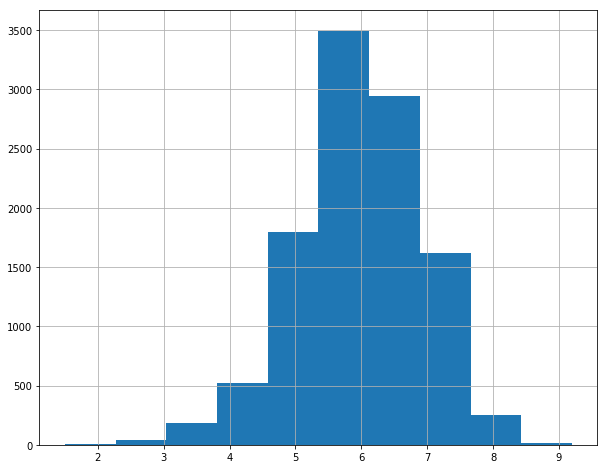

In [52]:
df['vote_average'].hist(figsize=(10, 8))

This is a histogram of voter ratings for each movie. This stat seemed like the one that didn't have outliers and didn't have a crazy range (like budget or revenue), but still showed how much people that saw this movie liked it. If a movie company wanted one stat to be the highest, (aside from revenue), I feel like budget would be their top priority. 

### Comparison

#### Budget vs Viewer Rating

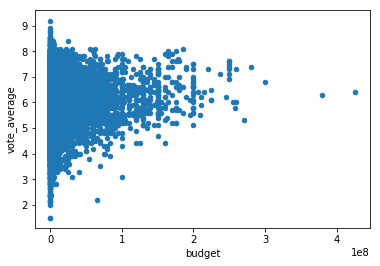

In [65]:
df.plot(x='budget', y='vote_average', kind='scatter')

This was an interesting plot to look at, because it shows that there really isn't a strong correlation between budget and voter ratings. 

Even at 0 budget, it can be a really good movie or a really bad one. And the higher the budget, there are usually higher ranges, but the highest ratings come from the low budget films.

#### Popularity vs Viewer Ratings

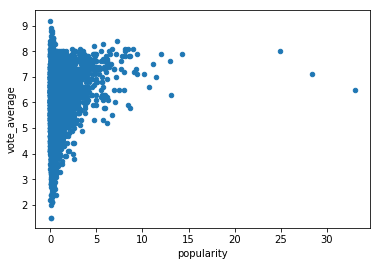

In [67]:
df.plot(x='popularity', y='vote_average', kind='scatter')

This chart, similar to the budget one, shows that there is little correlation between popularity and viewer ratings.

The one correlation is that the vote average doesn't get below 5 unless the popularity is very low. This might change if we had data on more popular movies. But with the data given, there is still an average of around 7-8.

## Question 2: Does vote count correlate with any other variables?

#### Histogram

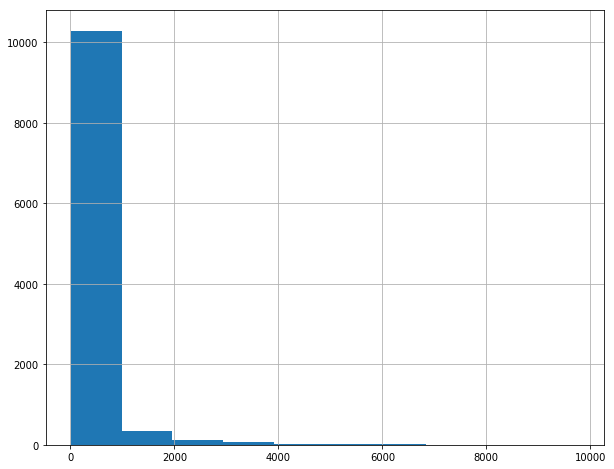

In [27]:
df['vote_count'].hist(figsize=(10, 8))

This is a histogram of vote counts. But as you can see we lose a lot of data by showing every value. Let's cut it down from 0 to 2000

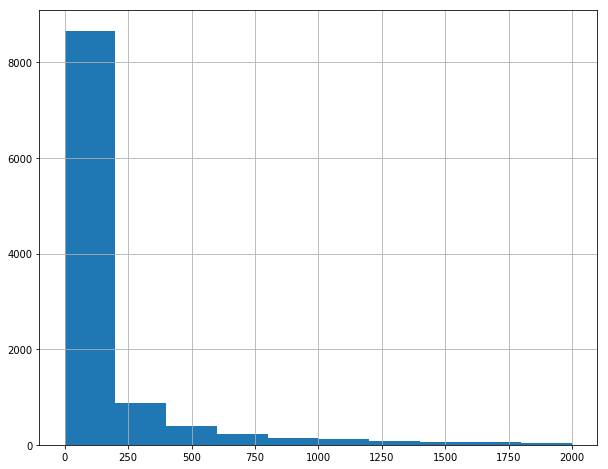

In [28]:
df['vote_count'].hist(figsize=(10, 8), range=(0, 2000))

More of the same it looks like. Let's cut it down some more to get more info.

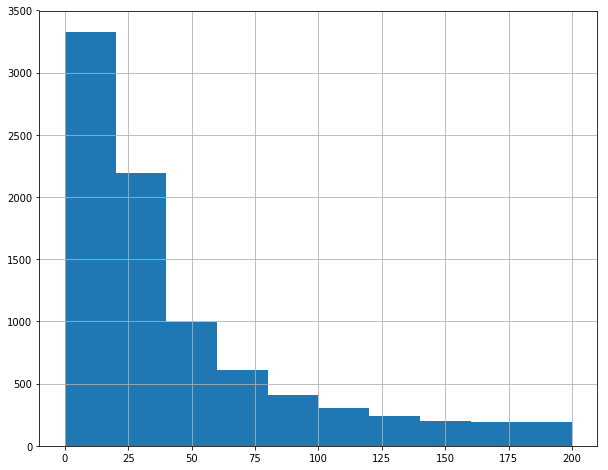

In [20]:
df['vote_count'].hist(figsize=(10, 8), range=(0, 200))

This helps us to see more of the data, most of it is between 0-25, then slowly goes down every interval. It helps me to visualize the first histogram more accurately to see this data.

#### Comparison

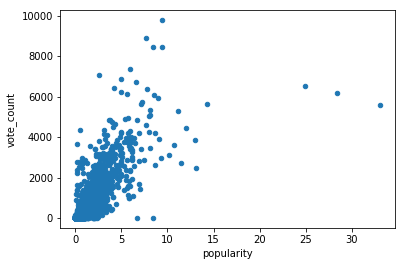

In [25]:
df.plot(x='popularity', y='vote_count', kind='scatter')

From this, we can gather that popularity has a positive correlation with vote count. This makes sense because the more popular a movie is, the more votes it should get with a rating, either good or bad. The surprising part is that there can be movies that aren't that popular but get a lot of votes.

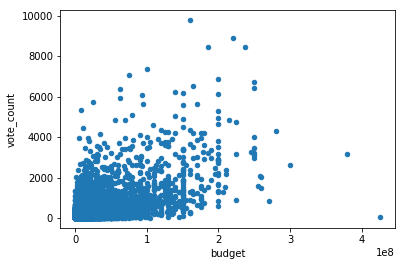

In [29]:
df.plot(x='budget', y='vote_count', kind='scatter')

As we can see, budget and vote count is not really correlated to one another. So the number of votes or ratings that a movie gets does not necessarily depend on the budget of the movie.

## Conclusion

My favorite thing that I got out of this project is the little correlation that I found between ratings and popularity, and ratings and budget. It was nice to see that a movie can still get great or terrible ratings no matter the popularity or hoe much money they spent on it. However, as I imagined, popularity does have a factor in how many votes there are for a movie, even if the overall rating isn't better, more people will review it.

Some of the limitations that I found was there was a lot of missing data and the movies that it had where skewed. What I mean is that there were a lot of movies that are unpopular, with a lot budget and a lot revenue. It would have been cool to look at only big box office movies, or just to have more of those instead of just a handful.

Another limitation where I was not sure of what to do was when filling in the zeroes with missing data, it felt like it was messing up the data to fill in the zeroes with the average. It didn't end up changing much but I was not sure what else to do with the data given.